# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

/home/mostafa/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [2]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

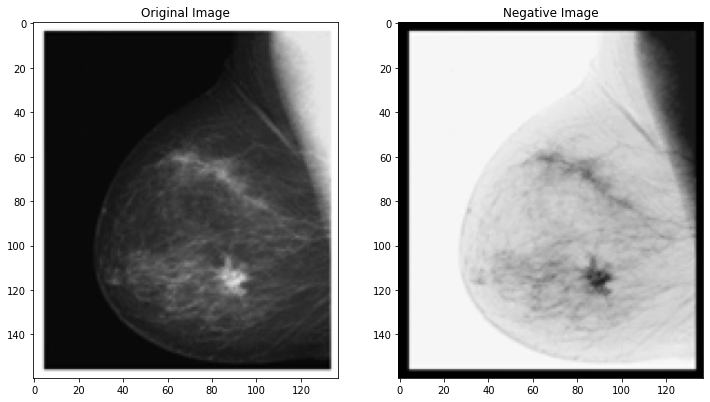

In [11]:
'''
1
Negative Transformation
'''
def negative(image, greyScaleSize=256): 
   return (greyScaleSize - 1) - image

image = rgb2gray(rgba2rgb(io.imread('imgs/Picture1.png'))) # png image with alpha channel
show_images([image, negative(image)],
            ['Original Image', 'Negative Image'])



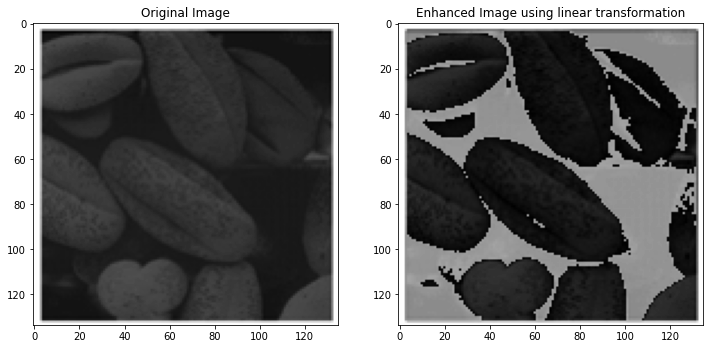

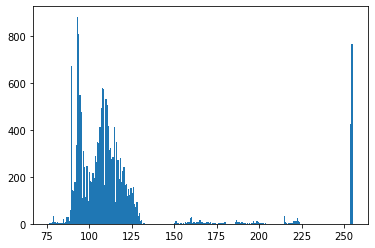

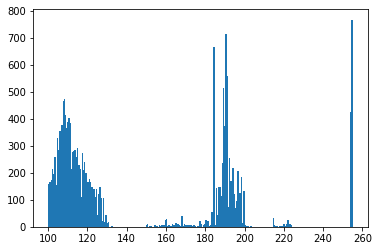

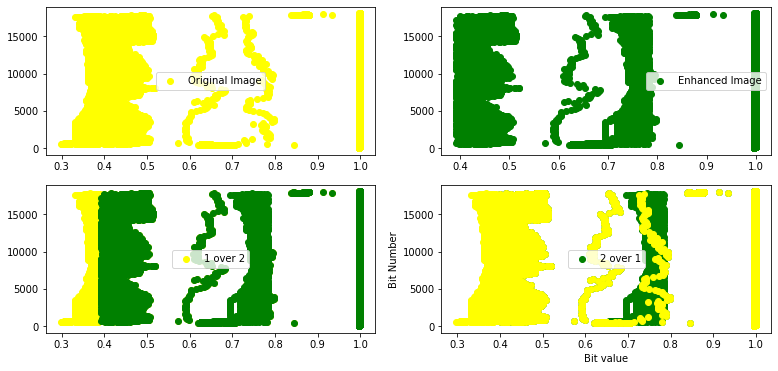

In [23]:
'''
2
Contrast Enhancement
'''
def comparePlotImage(image1, image2):
    plt.ion()
    fig = plt.figure(figsize=(13,6)) # creating a plot
    
    ax = fig.add_subplot(221) # plotting a plot
    ax.scatter(image1.flatten(), range(len(image1.flatten())), color = 'yellow')   
    ax.legend(["Original Image"])

    bx = fig.add_subplot(222)
    bx.scatter(image2.flatten(), range(len(image2.flatten())), color = 'green')   
    bx.legend(["Enhanced Image"])

    cx = fig.add_subplot(223)
    cx.scatter(image1.flatten(), range(len(image1.flatten())), color = 'yellow')    
    cx.scatter(image2.flatten(), range(len(image2.flatten())), color = 'green')  
    cx.legend(["1 over 2"])

    dx = fig.add_subplot(224)
    dx.scatter(image2.flatten(), range(len(image2.flatten())), color = 'green')   
    dx.scatter(image1.flatten(),range(len(image1.flatten())), color = 'yellow')   
    dx.legend(["2 over 1"])

    plt.ylabel('Bit Number')
    plt.xlabel('Bit value')
    plt.show() # show plot

# 0->B, 255->W
# 0:100 -> 50:200
# 50 + (150 * float(val/100))
def contrastEnhance(image):
    def mapping(val):
        return (50/255 + (3 * float(val / 2)))
    enhancedImage = np.array(image).flatten()
    # acts as a generator, yield one element at time, doesn't generate the whole list as the normal list comperhension
    enhancedImage = np.fromiter((( mapping(val) if (val>=0 and val <=100/255) else val) for val in enhancedImage),dtype=enhancedImage.dtype)
    enhancedImage = enhancedImage.reshape(image.shape)
    return enhancedImage


image = rgb2gray(rgba2rgb(io.imread('imgs/Picture2.png'))) # png image with alpha channel
show_images([image, contrastEnhance(image)],
            ['Original Image',  'Enhanced Image using linear transformation'])


showHist(image)
showHist(contrastEnhance(image))
comparePlotImage(image, contrastEnhance(image))




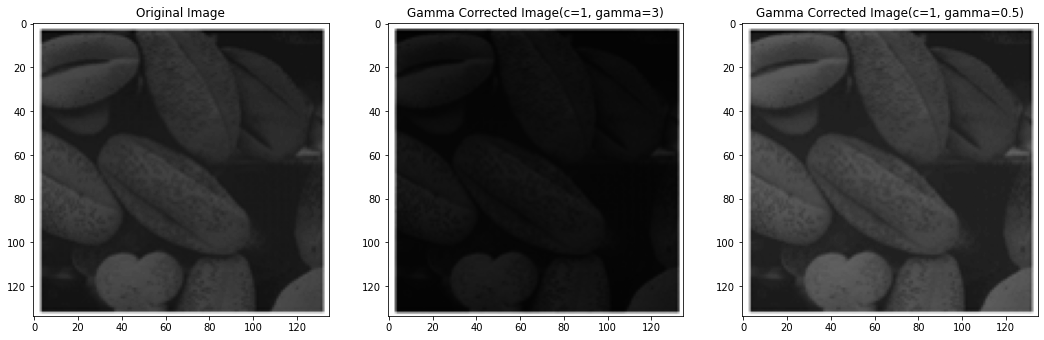

In [27]:
'''
3
Gamma Correction
What is the effect of decreasing 𝛾

# Decreasing gamma makes the image more dark (if the color values are represented from 0 to 1)
# Because by increasing the raised power to a fraction number the number gets smaller (darker pixels)
'''
def gammaCorrection(image,c, y): 
   return (c*(image**y))

image = rgb2gray(rgba2rgb(io.imread('imgs/Picture2.png'))) # png image with alpha channel
show_images([image, gammaCorrection(image, c=1, y=3), gammaCorrection(image, c=1, y=0.5)],
            ['Original Image', 'Gamma Corrected Image(c=1, gamma=3)', 'Gamma Corrected Image(c=1, gamma=0.5)'])



107, 2356
108, 1800
107, 2356
106, 2596
99, 4423
101, 1387
102, 2605
107, 2356
107, 2356
103, 2505
112, 575
164, 118
200, 18
197, 19
170, 46
182, 18
213, 10
214, 15
212, 10
197, 19
137, 2629
112, 575
110, 1198
109, 1371
112, 575
110, 1198
107, 2356
105, 1308
106, 2596
106, 2596
107, 2356
109, 1371
108, 1800
106, 2596
106, 2596
106, 2596
99, 4423
98, 4234
99, 4423
101, 1387
99, 4423
102, 2605
103, 2505
105, 1308
103, 2505
119, 490
147, 879
205, 16
204, 9
209, 9
207, 16
193, 12
142, 1459
123, 1394
110, 1198
107, 2356
105, 1308
103, 2505
105, 1308
103, 2505
102, 2605
99, 4423
98, 4234
99, 4423
102, 2605
102, 2605
99, 4423
99, 4423
94, 3473
97, 1572
97, 1572
97, 1572
95, 3050
94, 3473
94, 3473
93, 1813
91, 1506
94, 3473
95, 3050
102, 2605
105, 1308
113, 1079
122, 1949
130, 1200
119, 490
97, 1572
94, 3473
94, 3473
94, 3473
93, 1813
91, 1506
91, 1506
89, 1684
89, 1684
86, 1601
87, 4016
86, 1601
87, 4016
87, 4016
87, 4016
87, 4016
87, 4016
87, 4016
87, 4016
87, 4016
87, 4016
89, 1684
89, 1684

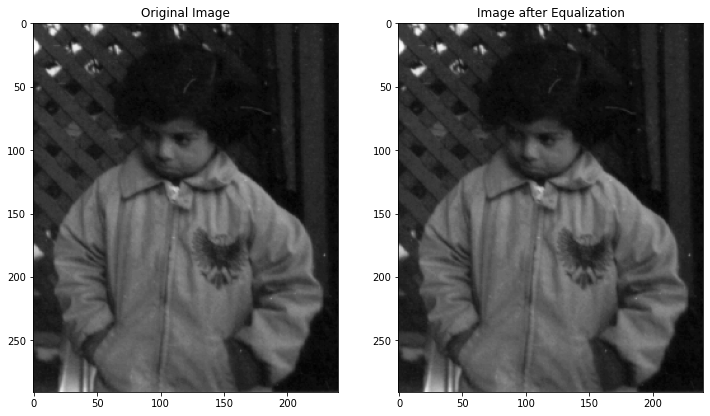

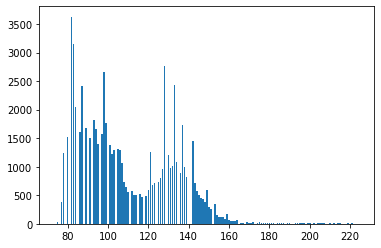

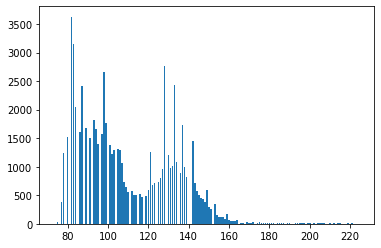

In [6]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''

def getImageWithHist(name):
    
    # read image and get its parameters
    image = np.array(io.imread('imgs/' + name + '.tif'))
    flattenedImage = image.reshape(image.shape[0] * image.shape[1]) # flatten the image to increase performance 
    
    N, M = image.shape
    G = len([val for val in flattenedImage if val > 0])

    # Calculate the histogram of gray-levels for the image
    H = np.zeros(G)    
    for val in flattenedImage:
        H[val] +=1
    # for h in H:
    #     print(h)
    # Form the cumulative image histogram, H_c
    H_c = np.zeros(G)
    for i in range(1, G):
        H_c[i] = (H[i-1] + H[i])

    # for h in H_c:
    #     print(h)
    # iterate over the image pixel-by-pixel and write an output image with the gray-levels using the mapping formula
    for p in flattenedImage:
        print(p, end=", ")
        p = round((G - 1) * H_c[p] / (N * M))
        print(p)
    
    flattenedImage.resize(image.shape) # return the image into its original size

    # Show the output
    show_images([image,flattenedImage],
            ['Original Image',  'Image after Equalization'])
    showHist(image) 
    showHist(flattenedImage) 

getImageWithHist("pout")
# getImageWithHist("tire")